## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

________________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

# SOLUCION -4.1 Little Red Riding Hood Network

Train a neural network to solve the Little Red Riding Hood problem in sklern and Keras. 
Try the neural networ with different inputs and report the results.

In [8]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [10]:
#create a data frame

d = {'Big Ears': [1,0,0], 'Big Teeth': [1, 1,0], 'Handsome': [0, 1,0], 'Wrinkled': [0, 0,1],'Scream': [1, 0,0],'Hug': 
       [0, 0,1],'Food': [0, 1,1],'Kiss': [0, 1,0]}

df = pd.DataFrame(data=d)
df


,Big Ears,Big Teeth,Food,Handsome,Hug,Kiss,Scream,Wrinkled
0,1,1,0,0,0,0,1,0
1,0,1,1,1,0,1,0,0
2,0,0,1,0,1,0,0,1


In [18]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
#https://github.com/inf0-warri0r/little_red_riding_hood/blob/master/README.pdf
#Initializing Neural Network
classifier = Sequential()

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=20, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [25]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_4 (Dense)                (None, 20)                  60         
______________________________________________________________________
activation_1 (Activation)      (None, 20)                  0          
______________________________________________________________________
dense_5 (Dense)                (None, 1)                   21         
______________________________________________________________________
activation_2 (Activation)      (None, 1)                   0          
Total params: 81
Trainable params: 81
Non-trainable params: 0
______________________________________________________________________


In [26]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [27]:
print(model.predict(np.array([[0, 0]])))

[[0.5]]


In [ ]:
#https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

In [28]:
#prediccion

def lrrh_input(vals):
    return pd.DataFrame(vals,index=['big ears', 'big teeth', 'handsome', 'wrinkled'], columns=['input'])

def lrrh_output(vals):
    return pd.DataFrame(vals,index=['scream', 'hug', 'offer food', 'kiss cheek'], columns=['output'])

In [29]:
in_vals = [0, 0, 0, 0]
lrrh_input(in_vals)

,input
big ears,0
big teeth,0
handsome,0
wrinkled,0


In [31]:
lrrh_output(model.predict(in_vals))

ValueError: Error when checking input: expected dense_4_input to have shape (2,) but got array with shape (1,)

# 4.2 Boston House Price Prediction

1. Load the dataset using from sklearn.datasets import load_boston.

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


2.Create a DataFrame using the attribute .data from the loading function of Scikit-learn.

In [11]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


3.Assign the columns of the DataFrame so they match the .feature_names attribute from the loading function of Scikit-learn.

In [12]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

4.Assign a new column to the DataFrame which holds the value to predict, that means, the .target attribute of the loading function of Scikit-learn. The name of this columns must be MEDV.

In [13]:
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [14]:
target.head()
target.shape

(506, 1)

In [15]:
fff=pd.merge(df, target, right_index=True, left_index=True)

In [16]:
#http://scikit-learn.org/stable/datasets/index.html
fff.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
fff.shape

(506, 14)

5.Use the function .describe() from Pandas for obtaining statistics about each column.

In [18]:
fff['CRIM'].describe()

count    506.000000
mean       3.593761
std        8.596783
min        0.006320
25%        0.082045
50%        0.256510
75%        3.647423
max       88.976200
Name: CRIM, dtype: float64

In [19]:
fff['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [20]:
fff['INDUS'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

In [21]:
fff['CHAS'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

In [22]:
fff['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

In [23]:
fff['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [24]:
fff['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [25]:
fff['DIS'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

In [26]:
fff['RAD'].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [27]:
fff['TAX'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [28]:
fff['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [29]:
fff['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

In [30]:
fff['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [31]:
fff['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

# 4.3 Feature analysis:

Using the DataFrame generated in the previous section:

Filter the dataset to just these features:
Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
Dependent: 'MEDV'.

In [32]:
datax=fff.filter(items=['LSTAT', 'INDUS','NOX', 'RM', 'AGE'])
datay=fff.filter(items=['MEDV'])
dataz=fff.filter(items=['LSTAT', 'INDUS','NOX', 'RM', 'AGE','MEDV'])

Generate a scatter matrix among the features mentioned above using Pandas (scatter_matrix) or Seaborn (pairplot).
Do you find any relationship between the features?

In [33]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

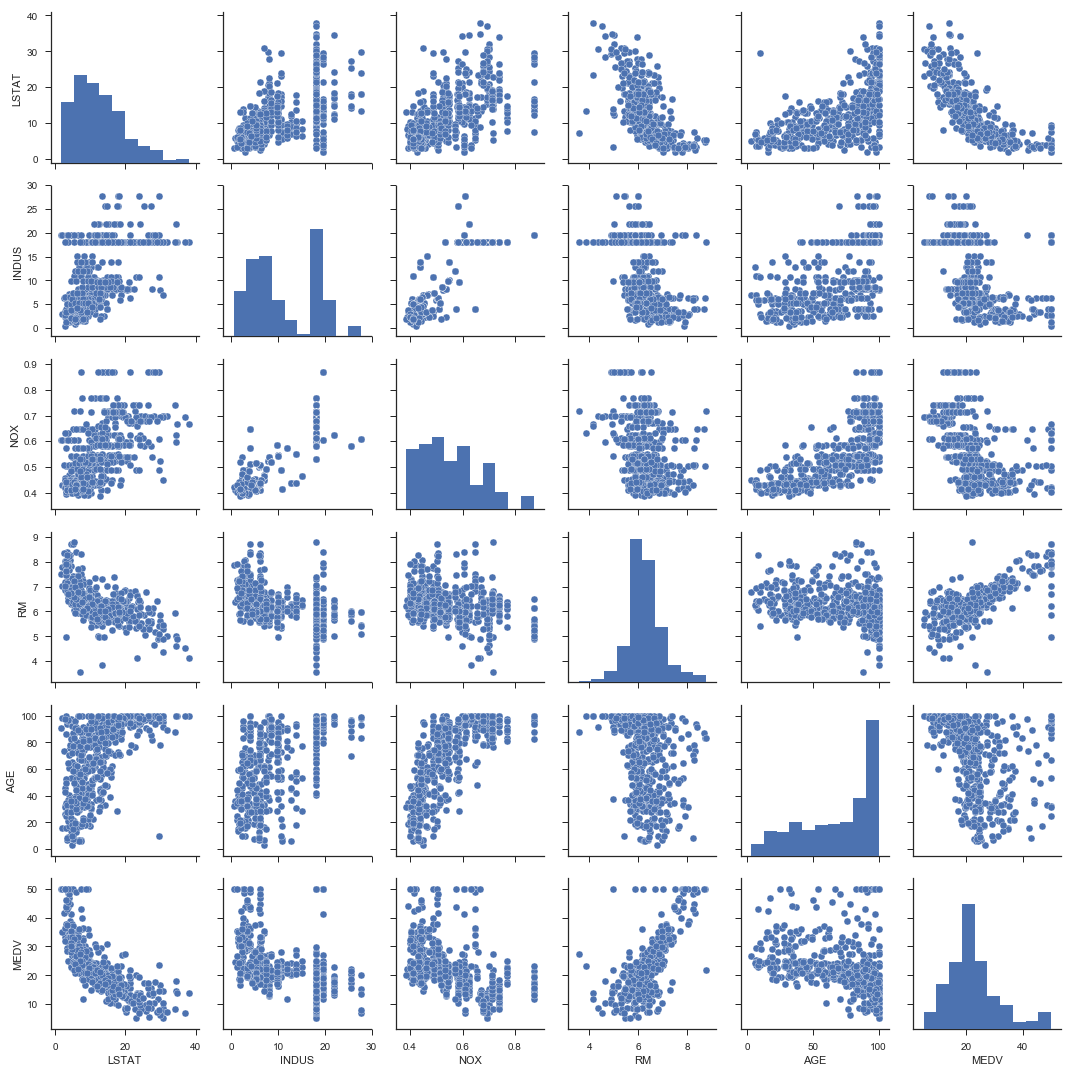

In [34]:
g = sns.pairplot(fff, vars=['LSTAT', 'INDUS','NOX', 'RM', 'AGE','MEDV'])

Conclusiones: De acuerdo a los graficos anteriores, se ve una relación entre la variable MEDV y LSTAT por ejemplo, esta relación es inversa. si se entiende LSTAT como  % lower status of the population, a medida que aumenta dicho porcentaje disminuye el precio. por otro lado se evidencia una relación positiva entre RM y MEDV, es decir, a mayor numero de habitaciones, aumenta el precio. otrs variables no tienen una relacion clara, y por otro lado las distribuciones de MEDV y RM parecen mas o menos normales.

Generate the correlation matrix between these variables using numpy.corrcoef. Also include MEDV.
Which characteristics are more correlated?
BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [35]:
import numpy as np
matrix = np.corrcoef(dataz)

In [36]:
matrix

array([[1.        , 0.99075004, 0.97819441, ..., 0.98581972, 0.98307924,
        0.95808787],
       [0.99075004, 1.        , 0.94982287, ..., 0.99668853, 0.99682335,
        0.98682013],
       [0.97819441, 0.94982287, 1.        , ..., 0.94907484, 0.942261  ,
        0.89591008],
       ...,
       [0.98581972, 0.99668853, 0.94907484, ..., 1.        , 0.99973225,
        0.98987793],
       [0.98307924, 0.99682335, 0.942261  , ..., 0.99973225, 1.        ,
        0.99280619],
       [0.95808787, 0.98682013, 0.89591008, ..., 0.98987793, 0.99280619,
        1.        ]])

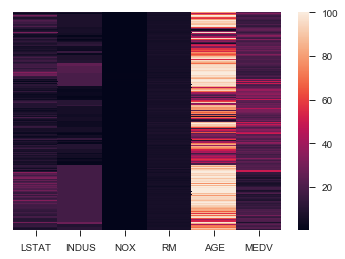

In [37]:
ax = sns.heatmap(dataz, xticklabels=1, yticklabels=False)

In [38]:
corr = fff.corr()
corr.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.199458,0.404471,-0.0552953,0.417521,-0.21994,0.350784,-0.377904,0.622029,0.579564,0.28825,-0.377365,0.45222,-0.385832
ZN,-0.199458,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.404471,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0552953,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.417521,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.21994,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
AGE,0.350784,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


conclusiones: de acuerdo a la matrix de correlaciones anterior, se evidencia que las variables mas correlacionadas son RAD CON TAX  (RAD: index of accessibility to radial highwaysTAX -TAX: full-value property-tax rate per 10,000 USD) con un valOr de 0,91. NOX Y INDUX tambien estan altamente correlacionadas con un valor de 0,76. Y por ultimo entre las variables mas relevantes se encuentra LSTAT.

# 4.4 Modeling linear and non linear relationships  

Generate two new subsets filtering these characteristics:
D1 :  X='RM  y='MEDV'
D2 :  X='LSTAT y='MEDV'

In [152]:
D1=fff.filter(items=['RM', 'MEDV'])
D2=fff.filter(items=['LSTAT', 'MEDV'])

In [153]:
X = D1.drop(['MEDV'], axis=1)
y = D1['MEDV']
D1.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [154]:
X2 = D2.drop(['MEDV'], axis=1)
y2 = D2['MEDV']
D2.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


Text(0,0.5,'MEDV')

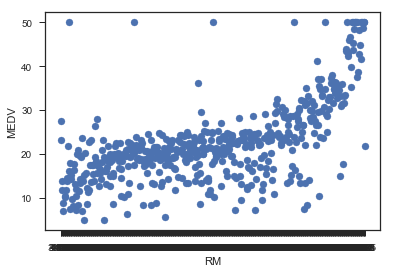

In [155]:
#plot de D1

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0,0.5,'MEDV')

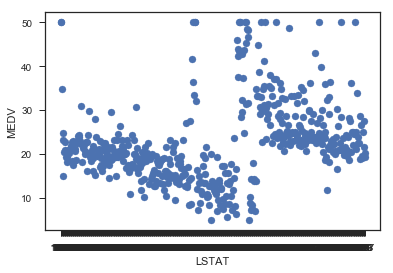

In [156]:
#plot de D2

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X2, y2)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

For each subset, generate a training partition and a test partition using a ratio of  70%−30%70%−30%

In [158]:
#normalizacion de la data D1
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std


In [159]:
#normalizacion de la data D2
y2_mean, y2_std = y2.mean(), y2.std()
X2_mean, X2_std = X2.mean(), X2.std()

y2 = (y2 - y2_mean)/ y2_std
X2 = (X2 - X2_mean)/ X2_std


In [160]:
# create training and testing vars
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

Train a linear regression model on both subsets of data:
Report the mean square error on the test set
Print the values of  ww  and  w0w0  of the regression equation
Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
How does the model perform on  D1D1  and  D2D2 ? Why?

In [161]:
# fit a model D1

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [162]:
# make predictions for testing set D1
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 0.482910788065306
MSE 0.5903678837152903
RMSE 0.7683540093702188


Text(0,0.5,'predictions')

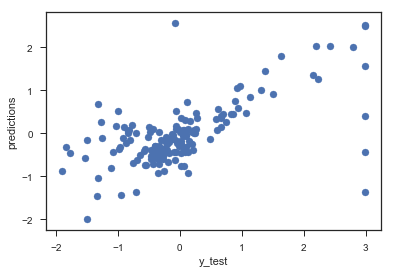

In [163]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [164]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.39618920571640925

In [165]:
# fit a model D2

lm = linear_model.LinearRegression()
model = lm.fit(X2_train, y2_train)
predictions2 = lm.predict(X2_test)

In [166]:
# make predictions for testing set D1
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y2_test,predictions2))
print('MSE',metrics.mean_squared_error(y2_test,predictions2))
print('RMSE',np.sqrt(metrics.mean_squared_error(y2_test,predictions2)))

MAE 0.4512665637016447
MSE 0.38363135821713223
RMSE 0.6193798174118464


Text(0,0.5,'predictions')

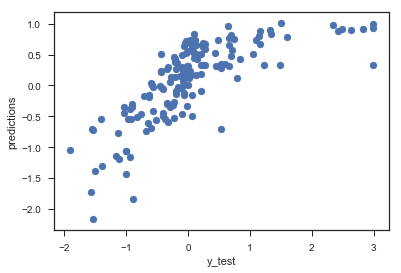

In [167]:
## The line / model
plt.scatter(y2_test, predictions2)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [168]:
from sklearn.metrics import r2_score
r2_score(y2_test, predictions2)

0.5435025610202422

conclusiones: contrastando los graficos entre la variable X y y se Observa que no hay una relación lineal clara, para el caso del primer plot, en donde se tiene a X como RM, que hace referencia a el numero de habiltaciones, la relacion con el precio tiene mas un forma cuadratica. al contrastar el precio con la variable LSTAT la cual hace referencia a % población, no existe una relación clara. al realizar una regresion lineal para precedir el precio con estas variables se observa que el MSE es de 0.59 vs. 0,38. ( en ambos casos se normalizo la data). por otro lado, el R cuadrado del pimero corresponde a 0.39 vs. 0.54 del segundo. por lo cual en este caso es mejor unsa la variable LSTAT que RM ya que predice con un mejor ajuste el precio.

# 4.5 Training a regression model


Generate a 70-30 partitioning of the data using all the features. (Do not include the dependent variable MEDV)
Train a linear regression model with the objective of predicting the output variable MEDV.
Report the mean square error on the test set

In [169]:
X = fff.drop(['MEDV'], axis=1)
y = fff['MEDV']

In [170]:
# create training and testing vars
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [171]:
# fit a model with all the data

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [172]:
# make predictions for testing set 
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 3.4926854528337237
MSE 26.98754061779074
RMSE 5.194953379751424


In [173]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7044548611431882

Train a regression model using MLPRegressor in order to predict the output variableMEDV.
Report the mean square error on the test set

In [178]:
from sklearn.neural_network import MLPRegressor
import numpy as np

X = fff.drop(['MEDV'], axis=1)
y = fff['MEDV']

solvers = ['lbfgs', 'sgd', 'adam']

for model in solvers:
    reg = MLPRegressor(solver=model, verbose=True, max_iter=1000)
    print (' fitting ', model)
    reg.fit(X, y)


 fitting  lbfgs
 fitting  sgd
Iteration 1, loss = 884638883.53964639
Iteration 2, loss = 1502751.14111377
Iteration 3, loss = 3409795.56520083
Iteration 4, loss = 5304781.59665203
Iteration 5, loss = 6953080.92078198
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
 fitting  adam
Iteration 1, loss = 193.78825059
Iteration 2, loss = 94.46926630
Iteration 3, loss = 85.17983906
Iteration 4, loss = 39.05692521
Iteration 5, loss = 61.84512845
Iteration 6, loss = 50.50207266
Iteration 7, loss = 38.99473880
Iteration 8, loss = 46.73045684
Iteration 9, loss = 36.65613053
Iteration 10, loss = 34.43069328
Iteration 11, loss = 37.21696482
Iteration 12, loss = 32.21199308
Iteration 13, loss = 33.19994574
Iteration 14, loss = 32.10457668
Iteration 15, loss = 30.25741798
Iteration 16, loss = 30.30145567
Iteration 17, loss = 28.99171914
Iteration 18, loss = 28.89220784
Iteration 19, loss = 28.54250711
Iteration 20, loss = 27.87967667
Iteration 21, loss = 27.6

In [179]:
predictions3 = reg.predict(X_test)

In [180]:
# make predictions for testing set 
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y_test,predictions3))
print('MSE',metrics.mean_squared_error(y_test,predictions3))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions3)))

MAE 4.024545836334971
MSE 37.145474469866485
RMSE 6.094708727237626


In [181]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions3)

0.593213603063118

Scale the data so that they have zero mean variance one per feature (only  XX ). You can use the following piece of code:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
Check more information about StandardScaler here.

Train the following models:
Train a linear regression model using the scaled data.
Report the mean square error on the test set

In [182]:
X = fff.drop(['MEDV'], axis=1)
y = fff['MEDV']

In [183]:
#normalizacion de la data 
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std


In [184]:
# create training and testing vars
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [185]:
# fit a model with all the data

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [186]:
# make predictions for testing set 
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 0.38185722195493055
MSE 0.2538899816488057
RMSE 0.5038749662850951


In [187]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7211885430534029

Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the scaled data.
Report the mean square error on the test set
Which model has better performance? Why?

In [196]:
from sklearn.neural_network import MLPRegressor
import numpy as np


solvers = ['lbfgs', 'sgd', 'adam']

for model in solvers:
    reg = MLPRegressor(solver='lbfgs', alpha=0.05, hidden_layer_sizes=(128,512),verbose=True, max_iter=100)
    print (' fitting ', model)
    reg.fit(X, y)

 fitting  lbfgs
 fitting  sgd
 fitting  adam


In [197]:
predictions =   reg.predict(X_test)

In [198]:
# make predictions for testing set 
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 0.07171970108553212
MSE 0.010483258227436825
RMSE 0.10238778358494155


In [199]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.988487720228433

conclusiones: realizando una regresion lineal con todas las variables sin escalar la data, se observa un MSE de 26.98 y R cuadrado de 0.70. al normalizar la data con las mismas variables y metodo se observa una mejora en el MSE de 0.25 y R cuadrado de 0.72. al usar la liberia de MLPRegressor sin escalar la data, el MSE es de 37.14 y R cuadrado de 0,59. ( tiene un peor performance) sin embargo al usar la data normalizada arroja el mejor modelo on MSE Dde 0,07 y R cuadrado de 0,98.